# An Introduction to Statistics with Python




# Displaying Statistical Datasets

### Univariate Data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


f

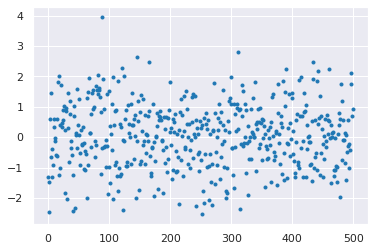

In [8]:
########## Scatter Plot

x = np.random.randn(500)
plt.plot(x,'.')
plt.show()

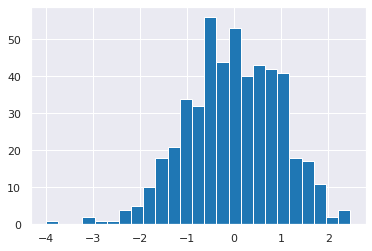

In [9]:
########## Histogram Plot

x = np.random.randn(500)
plt.hist(x,bins=25)
plt.show()

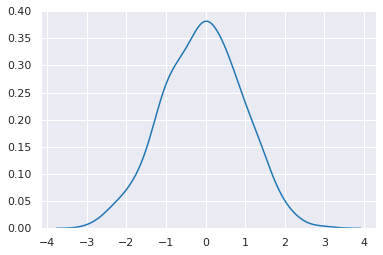

In [11]:
########## KDE Density Plot

x = np.random.randn(500)
sns.kdeplot(x)

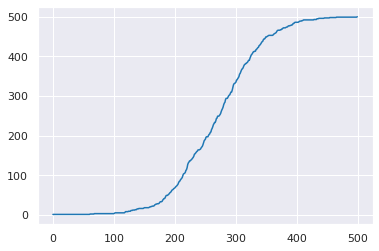

In [17]:
########## Cumulative Frequencies Plot

x = np.random.randn(500)

plt.plot(stats.cumfreq(x,500)[0])

<ErrorbarContainer object of 3 artists>

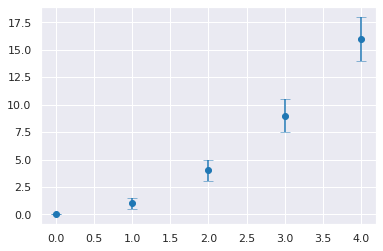

In [20]:
########## Error Bars Plot

index = np.arange(5)

y = index**2

errorbar = index/2

plt.errorbar(index,y,yerr=errorbar,fmt='o',capsize=5,capthick=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe5ed72bf90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe5ed70ca10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe5ed72b350>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe5ed839390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe5ed706990>],
 'means': []}

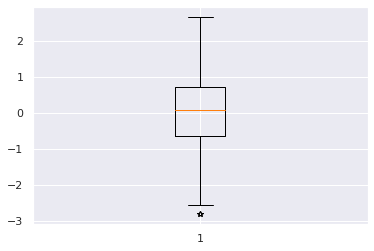

In [21]:
########## Box Plot

x = np.random.randn(500)

plt.boxplot(x,sym='*')

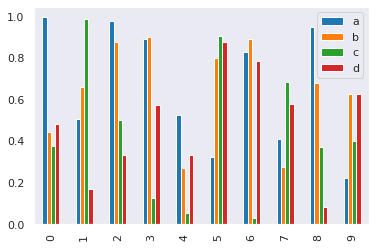

In [36]:
########## Grouped Bar Chart

df = pd.DataFrame(np.random.rand(10,4), columns = ['a','b','c','d'])

df.plot(kind='bar',grid=False)

In [37]:
df.head()

,a,b,c,d
0,0.995954,0.442129,0.377206,0.480887
1,0.508517,0.662078,0.988178,0.172023
2,0.976072,0.878416,0.503217,0.334259
3,0.891038,0.900510,0.125537,0.572995
4,0.523555,0.272261,0.056642,0.334247


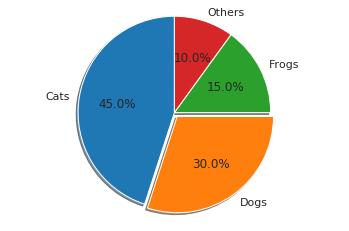

In [46]:
########## Pie Charts

txtLabels = 'Cats', 'Dogs', 'Frogs', 'Others'

fractions = [45,30,15,10]

offsets = (0, 0.05, 0, 0)

plt.pie(fractions, explode = offsets, labels=txtLabels, shadow=True, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

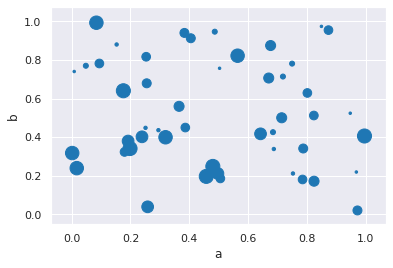

In [48]:
########## Bivariate ScatterPlot

df2 = pd.DataFrame(np.random.rand(50,4), columns=['a','b','c','d'])

df2.plot(kind='scatter', x='a', y='b', s=df['c']*200)

In [49]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

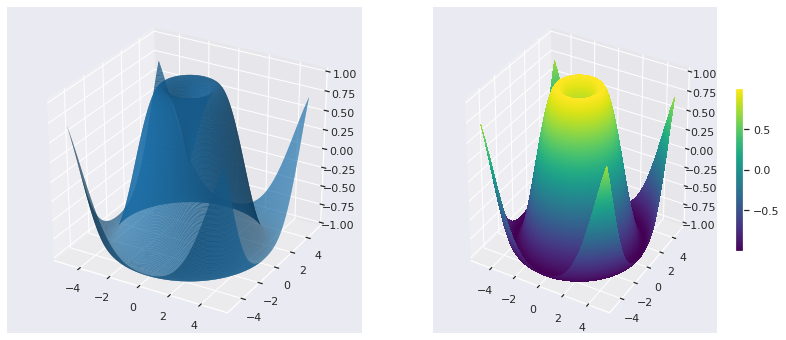

In [53]:
phi_x = np.arange(-5,5,0.01)
phi_y = np.arange(-5,5,0.01)
X,Y = np.meshgrid(phi_x, phi_y)

R = np.sqrt(X**2+Y**2)

Z = np.sin(R)

fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)


# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,  cmap=plt.cm.viridis, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)


# Exercícios

In [70]:
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/amstat/babyboom.dat.txt'

dados = pd.read_csv(url, header=None, delim_whitespace=True,  names= ['TOB', 'sex', 'Weight', 'Minutes'])


dados.head()

,TOB,sex,Weight,Minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [59]:
dados.describe()

,TOB,sex,Weight,Minutes
count,44.000000,44.000000,44.000000,44.000000
mean,1296.000000,1.590909,3275.954545,788.727273
std,690.704561,0.497350,528.032458,416.066931
min,5.000000,1.000000,1745.000000,5.000000
25%,792.750000,1.000000,3141.500000,482.750000
50%,1406.500000,2.000000,3404.000000,846.500000
75%,1918.500000,2.000000,3571.750000,1158.500000
max,2355.000000,2.000000,4162.000000,1435.000000


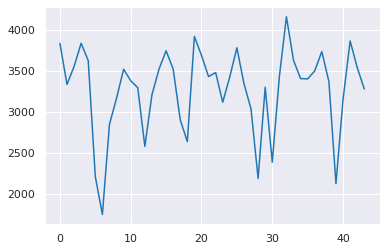

In [61]:
plt.plot(dados['Weight'])

(array([ 1.,  3.,  1.,  2.,  2.,  4., 13.,  9.,  8.,  1.]),
 array([1745. , 1986.7, 2228.4, 2470.1, 2711.8, 2953.5, 3195.2, 3436.9,
        3678.6, 3920.3, 4162. ]),
 <a list of 10 Patch objects>)

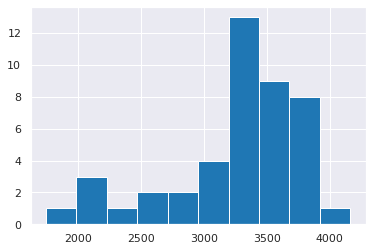

In [62]:
plt.hist(dados['Weight'])

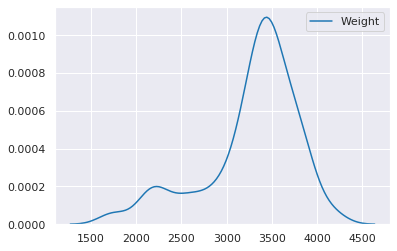

In [64]:
sns.kdeplot(dados['Weight'])

In [69]:
dados.pivot_table(values='Weight', index='sex', aggfunc = np.mean)

,Weight
sex,
1,3132.444444
2,3375.307692


In [76]:
def Verifica_Normal(data):
    
    """Verifica se os dados possuem uma distribuição normal"""
    alpha = 0.05
    (k2, pVal) = stats.normaltest(data)
    if pVal < alpha:
        print('Não São Normalmente Distribuídos')
    else:
        print('São Normalmente Distribuídos')

In [77]:
Verifica_Normal(dados['Weight'])

Não São Normalmente Distribuídos


In [78]:
Verifica_Normal(dados['Weight'][dados['sex']==1])

São Normalmente Distribuídos


/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [79]:
Verifica_Normal(dados['Weight'][dados['sex']==2])

Não São Normalmente Distribuídos


Text(0.5, 1.0, 'Todos os Dados')

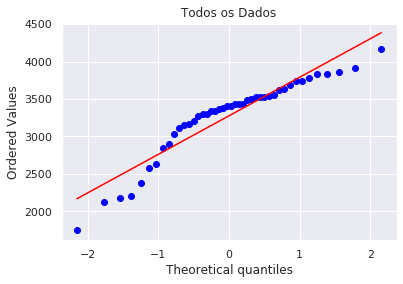

In [81]:
# Análise Visual QQPLOT

_ = stats.probplot(dados['Weight'], plot=plt)

plt.title('Todos os Dados')

Text(0.5, 1.0, 'Todos os Dados da Classe 1')

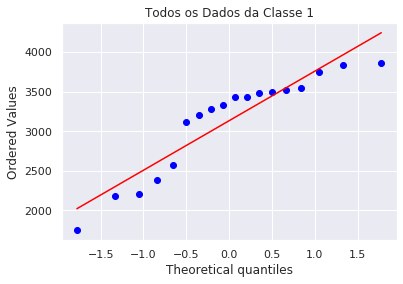

In [82]:
# Análise Visual QQPLOT

_ = stats.probplot(dados['Weight'][dados['sex']==1], plot=plt)

plt.title('Todos os Dados da Classe 1')

Text(0.5, 1.0, 'Todos os Dados da Classe 2')

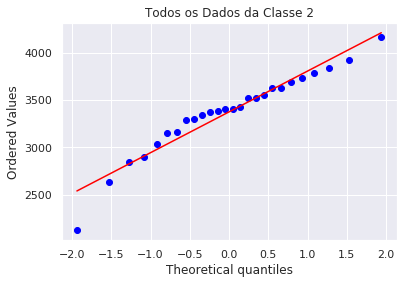

In [83]:
# Análise Visual QQPLOT

_ = stats.probplot(dados['Weight'][dados['sex']==2], plot=plt)

plt.title('Todos os Dados da Classe 2')

Pela análise final, os dados não são normalmente distribuídos.